In [108]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((600,900,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.rectangle(img,(2,2),(128,128),(0,255,0),2)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(32,64), font, 0.5,(255,255,255),1,cv2.LINE_AA)
img = cv2.ellipse(img,(64,64),(128,128),0,270,360,100,2)
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [110]:
import numpy as np
import cv2

events = [i for i in dir(cv2) if 'EVENT' in i]
print(dir(cv2))

['', 'ACCESS_FAST', 'ACCESS_MASK', 'ACCESS_READ', 'ACCESS_RW', 'ACCESS_WRITE', 'ADAPTIVE_THRESH_GAUSSIAN_C', 'ADAPTIVE_THRESH_MEAN_C', 'AGAST_FEATURE_DETECTOR_AGAST_5_8', 'AGAST_FEATURE_DETECTOR_AGAST_7_12D', 'AGAST_FEATURE_DETECTOR_AGAST_7_12S', 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION', 'AGAST_FEATURE_DETECTOR_OAST_9_16', 'AGAST_FEATURE_DETECTOR_THRESHOLD', 'AKAZE', 'AKAZE_DESCRIPTOR_KAZE', 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT', 'AKAZE_DESCRIPTOR_MLDB', 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT', 'AKAZE_create', 'AffineTransformer', 'AgastFeatureDetector', 'AgastFeatureDetector_AGAST_5_8', 'AgastFeatureDetector_AGAST_7_12d', 'AgastFeatureDetector_AGAST_7_12s', 'AgastFeatureDetector_NONMAX_SUPPRESSION', 'AgastFeatureDetector_OAST_9_16', 'AgastFeatureDetector_THRESHOLD', 'AgastFeatureDetector_create', 'Algorithm', 'AlignExposures', 'AlignMTB', 'AsyncArray', 'BFMatcher', 'BFMatcher_create', 'BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_REFLECT', 'BORDER_REFLECT101', 'BORDER_REFLECT_1

In [162]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

In [122]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,712,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

In [137]:
import cv2
img = cv2.imread('opencv.png')

print(img.itemset((80,80,2),100))

print(img.shape)
cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

None
(739, 600, 3)


In [143]:
import cv2
img = cv2.imread('opencv.png')
b,g,r = cv2.split(img)
cv2.imshow('image',b)

cv2.waitKey(0)
cv2.destroyAllWindows()

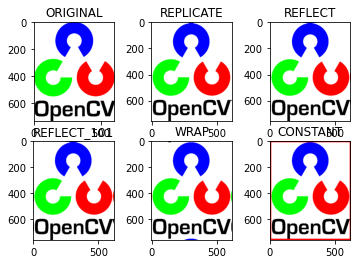

In [146]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('opencv.png')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [149]:
img1 = cv2.imread('opencv.png')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print(t)

1.5749204597937085


In [161]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

In [173]:
import cv2
import numpy as np

img = cv2.imread('opencv.png')

res = cv2.resize(img,None,fx=0.3, fy=0.25) #interpolation = cv2.INTER_CUBIC)

#OR

#height, width = img.shape[:2]
#res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

cv2.imshow('image',res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [178]:
import cv2
import numpy as np

img = cv2.imread('opencv.png',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

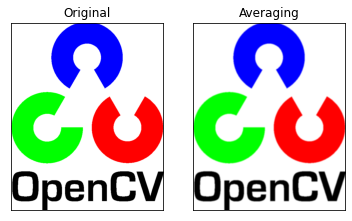

In [185]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

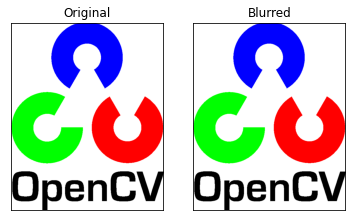

In [204]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png')

blur = cv2.bilateralFilter(img,12,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

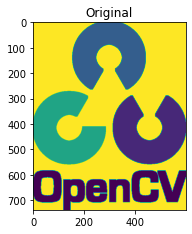

In [217]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 2)
dilation = cv2.dilate(img,kernel,iterations = 2)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)


plt.subplot(121),plt.imshow(erosion),plt.title('Original')

cv2.imshow('img1',img)
cv2.imshow('img2',closing)
cv2.imshow('img3',opening)
cv2.imshow('img4',gradient)


cv2.waitKey(0)
cv2.destroyAllWindows()

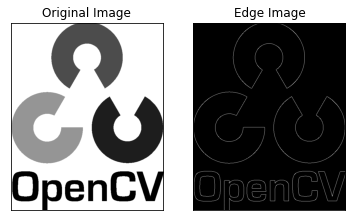

In [221]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png',0)
edges = cv2.Canny(img,400,400)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [222]:
import cv2
import numpy as np

img = cv2.imread('opencv.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

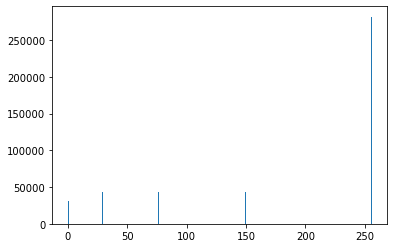

In [223]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

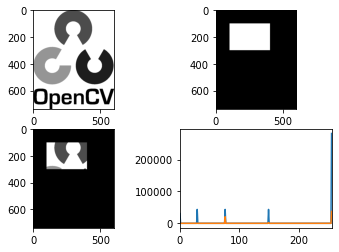

In [224]:
img = cv2.imread('opencv.png',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

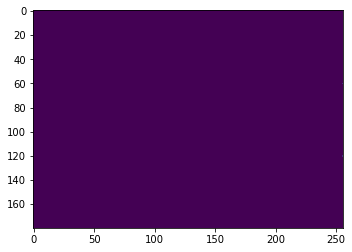

In [225]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(hist,interpolation = 'nearest')
plt.show()

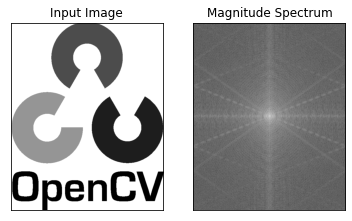

In [226]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('opencv.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [228]:
import numpy as np
import cv2

cap = cv2.VideoCapture('slow.flv')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
r,h,c,w = 250,90,400,125  # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret ,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imshow('img2',img2)

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv2.imwrite(chr(k)+".jpg",img2)

    else:
        break

cv2.destroyAllWindows()
cap.release()

TypeError: 'NoneType' object is not subscriptable

In [231]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()

In [233]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()

In [234]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

fgbg = cv2.createBackgroundSubtractorMOG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'createBackgroundSubtractorMOG'

In [235]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'createBackgroundSubtractorGMG'